In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [66]:
# Cargar la imagen
img = Image.open('../PEC1/data/DibujosNPT/N_307_GLS_TOTAL-ev5-h.png')
img_info = {
    "format": img.format,
    "size": img.size,
    "mode": img.mode
}
img_info

{'format': 'PNG', 'size': (554, 388), 'mode': 'RGB'}

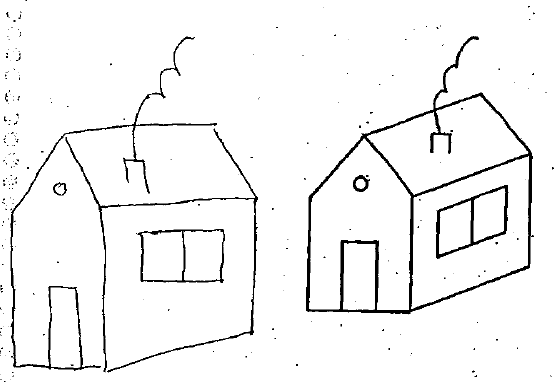

In [67]:
img

# Thresholding

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

## Simple Thresholding (Umbralización Simple)

Util para binarizar la imagen. se determina un valor de threshold (umbral) por el cual, si el pixel supera ese valor, este se cambia a 0, en el caso contrario pasa a ser 1

### Gray Scale

In [68]:
img_gray = img.convert('L')
img_gray_array = np.array(img_gray)

### Histogram

In [69]:
img_flatten = img_gray_array.flatten()

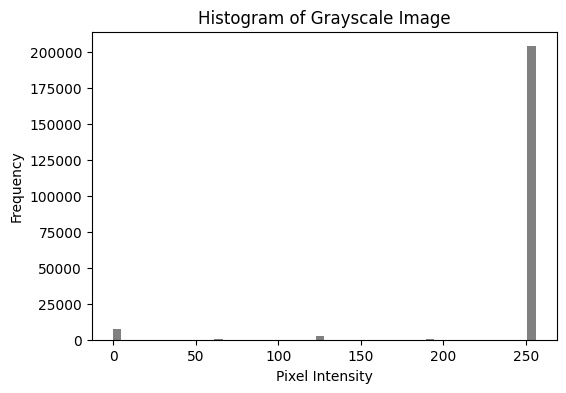

In [70]:
plt.figure(figsize=(6, 4))
plt.hist(img_flatten, range=(0, 256), color='gray', bins=50)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### Binary Image

<div style="text-align: center;">
    <img src="https://docs.opencv.org/4.x/threshold.jpg" alt="Imagen Binaria">
</div>

In [71]:
_, binary_img = cv2.threshold(img_gray_array, 100, 255, cv2.THRESH_BINARY_INV)

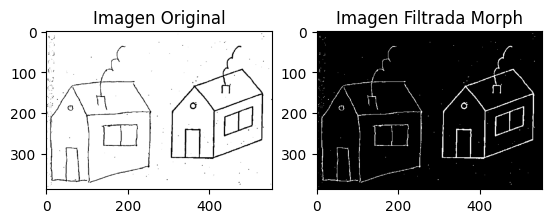

In [72]:
# Mostrar la imagen original y binarizada
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen Filtrada Morph')
plt.imshow(binary_img, cmap='gray')
plt.show()

## Adaptative Thresholding

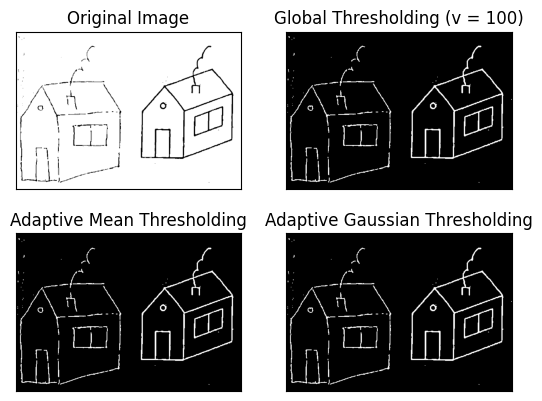

In [128]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('../PEC1/data/DibujosNPT/N_307_GLS_TOTAL-ev5-h.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,3)
 
ret,th1 = cv.threshold(img,200,255,cv.THRESH_BINARY_INV)
_, th1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,30)
th3 = cv.adaptiveThreshold(img,1155,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,155,2)
 
titles = ['Original Image', 'Global Thresholding (v = 100)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Denoising

## Morphological Denoising

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

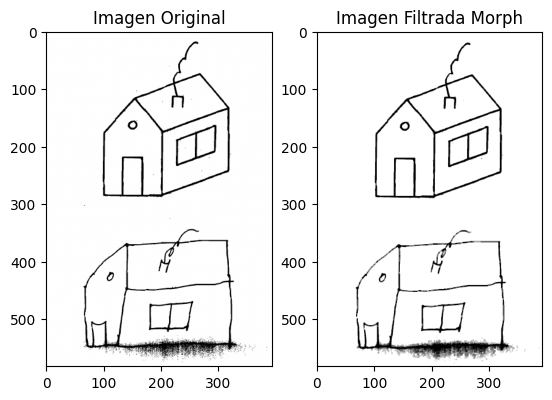

In [74]:
imagen = cv2.imread('../PEC1/data/DibujosNPT/N_328_THS_TOTAL-ev1-h.png', cv2.IMREAD_GRAYSCALE)

# Crear un kernel cuadrado de tamaño pequeño
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Aplicar apertura (erosión seguida de dilatación)
imagen_apertura = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)

# Aplicar cierre (dilatación seguida de erosión)
imagen_filtrada_morf = cv2.morphologyEx(imagen_apertura, cv2.MORPH_CLOSE, kernel)

# Mostrar la imagen original y filtrada
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen Filtrada Morph')
plt.imshow(imagen_filtrada_morf, cmap='gray')
plt.show()

## Open & Close

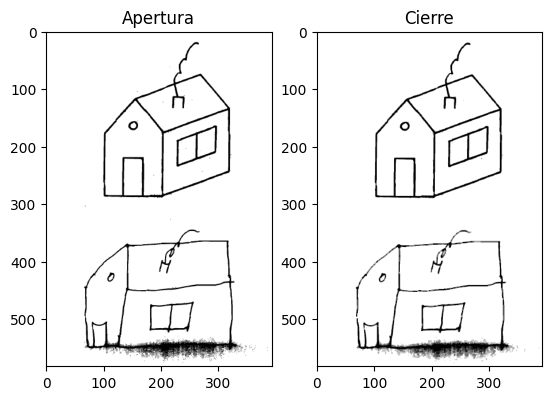

In [75]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen binarizada
imagen = cv2.imread('../PEC1/data/DibujosNPT/N_328_THS_TOTAL-ev1-h.png', cv2.IMREAD_GRAYSCALE)

# Crear un kernel (por ejemplo, un cuadrado de 3x3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Aplicar apertura para eliminar ruido de "sal"
imagen_apertura = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)

# Aplicar cierre para eliminar ruido de "pimienta"
imagen_cierre = cv2.morphologyEx(imagen_apertura, cv2.MORPH_CLOSE, kernel)

# Mostrar resultados
plt.subplot(1, 2, 1)
plt.title('Apertura')
plt.imshow(imagen_apertura, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Cierre')
plt.imshow(imagen_cierre, cmap='gray')
plt.show()

## Median Filter

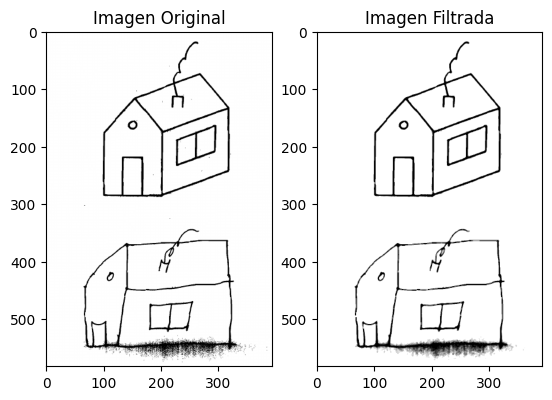

In [76]:
import cv2
import matplotlib.pyplot as plt

# Aplicar el filtro de mediana
imagen_filtrada = cv2.medianBlur(imagen, 3)  # Usa un tamaño de kernel pequeño (ej. 3x3)

# Mostrar la imagen original y filtrada
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen Filtrada')
plt.imshow(imagen_filtrada, cmap='gray')
plt.show()